In [ ]:
#중요한 라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lightgbm as lgb
import numpy as np

#분석에 문제가 없는 경고 메세지는 숨긴다(전처리 하다보면(특히 그래프 그릴때) 코드가 작동하는데도 오류메시지 나올때 있음)
import warnings
warnings.filterwarnings('ignore')

EDA(탐색적 데이터 분석)

In [ ]:
#데이터 전제척인 모습 살펴보기

#피쳐수, 컬럼명, 결측치여부, Dtype
df.info()

#수치데이터 특성, 데이터 요약
df.describe()

#데이터 크기 출력
df.shape

#데이터의 앞 인덱스 5개 출력
df.head(5)

#데이터의 뒤 인덱스 5개 출력
df.tail(5)


#컬럼별 결측치 개수의 합 출력
df.isnull().sum()
df.isna().sum()
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)


#특정 'column'에 대해 내림/오름차순으로 '10'개를 출력
df_ = df.sort_values(ascending = False, by = 'column').head(10) #ascending False : 내림차순  (head대신 tail을 쓴다면 ascending 지정 안해도 됨)
df #출력

In [ ]:
#결측치 데이터 제거
train.dropna(inplace = True) #inplace = True : 제거된 상태를 저장한다는 뜻
#결측치 상수로 채우기
df['column'].fillna(0, inplace = True) #결측치를 0으로 채움
#결측치를 그 column의 '평균치'로 채우기
df['column'].fillna(value = df['column'].mean(), inplace = True)
or
df['column'] = df['column'].fillna(value = df['column'].mean())

#원본 데이터를 변형시키는 것은 전처리때 할 일이지만
#EDA에 방해될 정도로 결측치가 많다면 먼저 처리해줘도 됨
#EDA단계에서 데이터를 변형시켜서 분석하기도 함
#애초에 원본 데이터를 카피해서 EDA 진행하는 것이 좋음
df_copy = df

In [ ]:
#범주형 데이터와 선형 데이터 분류(하면 데이터 전처리할 때 편함)
categorical_features = [col for col in train.columns if train[col].dtype == 'object']
numerical_features = [col for col in train.columns if train[col].dtype == 'int64']
#이렇게도 가능
cat = data.select_dtypes(exclude=np.number)

In [ ]:
#데이터 세부적인 모습 살펴보기

#pd.df.corr()
df.corr() #데이터간 상관계수를 -1 ~ +1로 출력. 보통 0.4 이상이면 상관관계가 있다고 봄. #상관관계는 인과관계와 다름

#범주형 데이터의 'column'의 콘텐츠들을 출력해줌
df['column'].unique()
#범주형 데이터의 'column'의 콘텐츠의 개수를 세어줌
df['column'].nunique()
#범주형 데이터의 'column'의 콘텐츠들과 거기에 속한 데이터수를 출력
df['column'].value_counts()
df.value_counts('column') #이렇게도 쓸 수 있음

#crosstab(도표) 만들기(은근 자주씀)
pd.crosstab(index = [data.column1, data.column2], columns = data.column3, values = data.column4, aggfunc = np.sum, margins = True).fillna(0)
#index : y축, columns : x축, values와 aggfunc : values를 aggfunc로 계산, margins : 총합 출력 여부, fillna : NaN 대체

#데이터의 'column1'에 대한 'column2'의 '평균' 출력
df[['column1', 'column2']].groupby('column1').mean().sort_values('column2')
#이렇게도 쓸 수 있음
df.groupby(['column1'])['column2'].mean()
#이렇게하면 그래프 그려줌
df.groupby(['column1'])['column2'].mean().plot()

#두 column의 상관관계(합, 평균) 출력
sample_sum = df[['column1','column2']].groupby('column1').sum()
sample_mean = df[['column1','column2']].groupby('column1').mean()

#column내의 데이터가 condition(조건)을 포함하는지 여부 출력
condition = ['value1', 'value2'] #조건 지정해주고
df.loc[df['column'].isin(condition)] #여기서 df.loc 빼고 돌려도 출력은 됨. 하지만 텍스트 형태가 보기 불편하게 나옴.

#column row내 데이터들의 조건 만족 여부 출력
df['column'] > 180
#조건을 만족하는 데이터들의 모든정보 출력
df[df['column'] > 180] #df[~df['column'] > 180] 이렇게 쓰면 조건 안맞는거만 출력
#조건 여러개를 달고싶으면
df[(df['column'] < m) & (df['column'] >= n)]
#조건 여러개를 각 칼럼에 달고싶으면 이렇게
df[(df['column1']!='value') & (df['column2']>=n)]
#조건을 만족하는 column 데이터들의 다른 column정보 출력
df[df['column'] > 180] [['column1', 'column2']]
or
df.loc[df['column'] > 180, 'column2' : 'column5'] #이런식으로도 가능

#column에서 특정 'value'를 갖는 데이터만 추출
df_ = df['column'] == 'value'
#조건을 여러개 쓰려면
df_ = df['column'].isin(['value1', 'value2', 'value3']) #column에서 value1 or 2 or 3에 해당하는 데이터 추출
df.loc[df_] #출력
#칼럼을 여러개 쓰려면
df_ = (df.column1 == 'value') & (df.column2 == n) #column1에서 'value'에 해당하고(and) column2에서 'n'에 해당하는 데이터 추출
#&대신 |쓰면 or연산임
#위에서 구한 조건에 맞는 데이터의 다른 칼럼값을 보고싶을 때
df.loc[df_, ['column_k', 'column_l', 'column_m']] #df_에 해당하는 데이터의 'column_k,l,m'값을 출력

#특정 범위를 column과 함께 출력
#df.loc[행범위(인덱스), 열범위(칼럼)]형식임.
df[:3] #인덱스 3까지 출력
df.loc[:3, 'column'] #인덱스 3까지 column이랑같이 출력해줌
df.loc[3:8, ['column1', 'column2']] #인덱스 3에서 8까지 column1,2랑 같이 출력
df.loc[2:5, 'column3':'column7'] #인덱스 2에서 5까지 column3~7이랑 같이 출력

In [ ]:
#그래프 그려서 살펴보기(위 분석기법들 활용해서 그래프 그래면 자세한 분석 가능)

#각종 그림자료형의 크기를 지정. 그림자료코드 윗줄에 써주면 됨. 크기지정 안해줘도 그림은 나옴
plt.figure(figsize=[15, 15]) #15x15크기로 하겠다는 뜻
figure.set_size_inches(15,15) #이렇게 해줘도 됨

#heatmap : 각 column간 상관계수를 그림으로 보여줌
sns.heatmap(df.corr(), annot = True) #annot : 각 셀 수치 표기

#heatmap에서 내림차순으로 표시하고싶을때
corr=data.corr()
top_corr=data[corr.nlargest(40,'column')['column'].index].corr() #nlargest(n, 'column', keep='first') : column에서 가장 큰것부터 n개 추출,
#keep = 'first' : 값이 같을 경우 위부터 추출, keep='last' : 값이 같을 경우 아래부터 추출, ='all' : 값이 같을 경우 모두 추출
figure, ax1 = plt.subplots(nrows=1, ncols=1)
#그림 사이즈지정
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1) #출력
#한 줄로 풀어쓰면
sns.heatmap(data[data.corr().nlargest(n,'column')['column'].index].data.corr(), annot = True, ax=ax1)

#이렇게도 쓰더라
corrs = df.drop(columns='id').select_dtypes(include=np.number).corr(method = 'kendall')
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

#두 column의 상관관계(합, 평균)를 그래프로 나타내기
sample_sum = df[['column1','column2']].groupby('column1').sum()
sample_mean = df[['column1','column2']].groupby('column1').mean()
fig,ax = plt.subplots(1,2); fig.set_size_inches(12,5)
ax[0].yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
ax[0].plot(sample_sum.index,sample_sum.column2,'o--'); ax[0].set_title('column2 x column1 (sum)')
ax[1].plot(sample_mean.index,sample_mean.column2,'o--'); ax[1].set_title('column2 x column1 (mean)')
plt.tight_layout()
plt.show()

#crosstab을 그래프로. ratio plot 제작
def ratio_table(cross_tab):
    return cross_tab.div(cross_tab.sum(axis=1),axis='index')
column_crosstab=pd.crosstab(df['column'],df['target'])
column_ratio=ratio_table(column_crosstab)
column_ratio=column_ratio.sort_values(by=0)
column_ratio.plot(kind='bar',stacked=True)

#각 column간 모든 상관관계를 출력
sns.pairplot(df)

#plt.plot 형식으로 각종 그래프 그리기
#명령어 기본 형태
plt.plot('column1', 'column2', data = df) #column1이 x축, column2가 y축이 기본
#아래는 plt.plot()에 추가할 수 있는 스타일들. 디테일을 넣어줄 때 필요함
#쓸때는 위 명령어의 ()안에 ''와 함께 써주면 됨
색깔
문자열	약자
blue	   b
green	   g
red	     r
cyan	   c
magenta	 m
yellow	 y
black	   k
white	   w

마커
마커	의미
.	    점
o	    원
v	    역삼각형
^	    삼각형
s	    사각형
*	    별
x	    엑스
d	    다이아몬드

선
문자열	의미
-	      실선
--	    끊어진 실선
-.	    점+실선
:	      점선
#아래는 그래프 외적인 설정들
plt.title(label, fontsize) #그래프 제목 생성, #fontsize : 글자크기
plt.xlabel(label, fontsize) #x축 이름 설정
plt.ylabel(label, fontsize) #y축 이름 설정
plt.axvline(x, color = 'color') #x축을 가로지르는 'color'색의 세로 선 생성
plt.text(x, y, 'text', fontsize) #원하는 위치에 'text' 생성
#한줄씩 나열하고 그래프 실행시키면 한꺼번에 적용돼서 나옴
#예시
plt.title('Plot 1', fontsize = 15)
plt.plot('column1', 'column2', 'o', data = train) #그래프의 핵심
plt.xlabel('hour', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.axvline(8, color = 'red')
plt.text(3, 200, 'go to work', fontsize = 10)
plt.savefig('plot1.png') #그래프를 .jpg로 저장
plt.show()

#독특한 형태의 그래프들(그래프마다 세부사항을 조절하는 다양한 명령어들이 있음. 너무 복잡해서 여기엔 중요한 것들만 적음)
#자주 쓰는 것들
#column에 대한 히스토그램 그래프를 그려줌
sns.distplot(df['column'], kde=True, bins=None) #kde : 선그래프 출력 유무, bins : 그래프x축 얼마나 촘촘히 나눌건지(높을수록 촘촘함)
#두 column에 대한 (scatterplot : 산점도)를 그려줌
sns.scatterplot(data = df, x='column1', y = 'column2') #hue = 'column3' 하면 column3에 대해 점들의 색을 나눠줌
#막대그래프
sns.barplot(data = df, x='column1', y = 'column2', ci=None) #ci=None : 신뢰구간(95%) 표시 안함

#잘 안쓰는 것들
#점으로 찍어줌
sns.stripplot(x='column1', y='column2', data=df)
#데이터 많은범위는 두껍게, 적으면 얇게 그려줌
sns.violinplot(x='column1', y='column2', data=df)
#중간값에 선, 25~75%에 큰박스, 그 위 아래로는 계속 (남은%)/2 씩 박스그림 그려줌
sns.boxenplot(x='column1', y='column2', data=df)
#25%~75%까진 박스, 그 위아래로 +- 1.5*IQR 까지 선, 여기서 벗어난 데이터는 점으로 표시
sns.boxplot(x='column1', y='column2', data=df)
#column1이 x, column2가 y인 산점도에 근사한 선형 직선도 포함시켜줌. 이상치 탐지에 유효
sns.regplot(df['column1'], df['column2'])
#산점도와 근사한 선을 함께 그려줌
sns.lmplot(x='column1', y='column2', data=df);
#box형 그래프 그려줌
sns.boxplot(x = 'column1', y = 'column2', data = df)

#그래프 여러개를 한번에 출력해주기
#그래프 4개의 자리를 지정해줌(2행2열의 ax1,2,3,4를 일단 지정)
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
#그래프 크기 지정
figure.set_size_inches(14,10)
#각 그래프별 그래프 내용 지정
sns.regplot(data['column_k'], data['column_l'], ax=ax1) #ax = ax1 : ax1자리에 그래프 그리기
sns.regplot(data['column_m'], data['column_l'], ax=ax2) #ax = ax2 : ax2자리에 그래프 기리기
sns.regplot(data['column_n'], data['column_l'], ax=ax3)
sns.regplot(data['column_k'] + data['column_m'] + data['column_n'], data['column_l'], ax=ax4)

전처리

In [ ]:
#전처리의 목적은 학습용 데이터를 변형시켜 학습 모델이 더 잘(예측 정확도가 높게)학습되도록 하는 것
#전처리를 어떻게 하는지에 따라 모델 성능 차이가 들쭉날쭉함
#전처리는 데이터에 따라 방법이 너무 다양함
#그래서 기법을 배우기보단
#전처리의 흐름을 이해하는 것이 필요
#그래서 실전 예시를 들고옴
#기법은 필요해질 때마다 검색해서 찾으면 됨
#물론 자주 쓰이는 기법들이 따로 있음
#대표적인게 범주형 데이터를 숫자 범주형 데이터로 인코딩하기인데 이건 아래에 나옴

#kaggle titanic 자료 EDA+전처리 과정
#목표 : 주어진 여러 사람의 데이터와 생존 여부로부터 학습해 다른사람의 생존 여부 예측
---EDA---
#kaggle titanic 자료에서 Pcalss(객실 등급)에 따른 생존률 비교
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#groupby에 as_index를 False로 하면 Pclass를 index로 사용하지 않음
# as_index를 True로 하면 Pclass를 index로 사용
# ascending : 오름차순


#생존 여부(Survived)에 따른 연령(Age) 분포
#생존'률'을 나타내는게 아닌 오직 연령 분포(사람수)를 나타냄
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)


#객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5
# 범례 추가
grid.add_legend();


#승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)
#왜 이게 생존율을 구하게 되는지 이해가 안됨.
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])
grid.add_legend()


#승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])
grid.add_legend()


#새로운 정보 추출ㅡㅡㅡㅡㅡㅡㅡㅡㅡ☆중요☆ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
#Name으로부터 구체적 성별(Miss, Mr, Mrs 등)을 Title이란 이름아래 추출
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])
#표현만 다르고 뜻은 같은 것은 통일시키고, Dr, Capt, Jonkheer 등 영향력 없는(수가 적은)정보는 Rare로 분류
#그리고 생존률 추출
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#변수들을 숫자형으로 바꿔줌
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


#성별(Sex) 변수를 숫자 범주형 변수로 바꿔줌
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


#나이(Age)의 결측치를 자체적으로 예상해서 채우기
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름

            age_guess = guess_df.median()

            # age의 random값의 소수점을 .5에 가깝도록 변형
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)


#연령(Age) 변수를 범주형 변수로 바꿔주기
# 임의로 5개 그룹을 지정
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
# 그룹당 생존률 출력
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
#AgeBand를 바탕으로 Age를 범주형 변수로 바꿔준 후, AgeBand변수는 제거
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]


#SibSp(형제와 배우자 수)와 Parch(부모와 자녀 수)를 가족과의 동반여부를 알 수 있는 새로운 변수로 통합
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
#통합된 변수당 생존률 출력
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#1은 동반X, 0은 동반했다는 새로운 변수 IsAlone을 생성
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
#새로운 변수당 생존률 출력
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
#필요없어진 SibSp, Parch, FamilySize 제거
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]


#Age변수와 Pclass를 곱한 Age*Class변수 생성
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass


#승선지(Ebmarked) 결측치를 최빈값으로 대체하기
#최빈값 확인
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port
#최빈값으로 대체
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
#승선지별 생존률 출력
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#승선지(Ebmarked) 변수를 범주형 변수로 바꿔줌
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


#요금(Fare) 변수를 중앙값으로 대체
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
#요금(Fare)을 숫자 범주형 변수로 바꿔줌
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

#전처리 끝

모델링 준비

In [ ]:
#모델링도 다양한 디테일을 추가할 수 있지만
#너무 어려웠다
#그래서 아래에 기본적인 모델링 과정만 적고
#그 아래에 모델링, 튜닝 관련 학문적 개념을 정리해놓은거라도 붙여놓음

In [ ]:
#데이터 분리하기
X_df = df.drop(['column'], axis=1) #axis = 0 : 열단위 적용, axis = 1 : 행단위 적용. #df에서 'column'만을 제외시킨 새 데이터 생성
Y_df = df['column'] #df에서 'column'만을 가져온 새 데이터 생성

In [ ]:
#기본적인, 자주 쓰이는 모델들
#모델 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

위의 모델들은 아래 주소에 간략히 설명되어있다.
#https://computer-science-student.tistory.com/114?category=1175520

In [ ]:
#귀찮으면 모델 하나로만 에측해서 바로 제출해도 되지만

#모델별로 학습 알고리즘이 달라서
#같은 데이터여도 학습하는 모델마다 정확도가 다르다
#그러니 모델 전부 학습시켜서 정확도를 보고
#가장 잘 학습되는 모델을 선택해보자

In [ ]:
#train용 데이터에서 일부를 떼어내서
#train용 데이터 내에서 자체적으로 학습, 예측 가능하도록
#트레인용과 테스트용으로 데이터세트 분리하자

from sklearn.model_selection import train_test_split

X = data.drop(columns='target')
y = data_concat['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)
#test_size : 전체의 몇%를 테스트로 쓸지

In [ ]:
#타켓에 크게 영향을 미치는 feature 찾기
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist(), top=50)

#이렇게도 가능
import shap

ex = shap.Explainer(model, X_train)
shap_values = ex(X_valid)
# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=10);

In [ ]:
#이제 이런식으로 하나씩 모델 돌려주고
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron
.
.
.

#정확도들 큰순서대로 정리해주고
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

#정확도 가장 놓은걸로 train데이터 전체를 학습시켜준 후
#이렇게 학습된 모델로 test데이터를 예측하여
#나온 결과를 제출하면 됨

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ실전성 있는(바로 쓸 수 있는) 정보 끝ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ모델링, 튜닝 개념정리ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
#다중공선성 / Scatter plot
#다중공선성 내용은 전처리단계로 이동시켜야되나??

#다중공선선은 상관관계가 높은 독립변수들이 동시에 모델에 포함될 때 발생합니다.
#만약 두 변수가 완벽하게 다중공선성에 걸려있다면, 같은 변수를 두 번 넣은 것이므로 모델이 결괏값을 추론하는 데 방해가 될 수 있습니다.

#ㅡ다중공선성 확인

#다중공선성을 확인 하는 방법은 크게 3가지가 있습니다.

#Scatter plot을 통한 확인
#Heatmap 그래프를 통한 확인
#VIF(Variance Inflation Factors, 분산팽창요인)을 통한 확인

#ㅡㅡㅡㅡㅡㅡㅡㅡㅡVIF(분산팽창요인)ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
#VIF는 변수간의 다중공선성을 진단하는 수치이며 범위 1부터 무한대입니다.
#통계학에서는 VIF 값이 10이상이면 해당 변수가 다중공선성이 잇는 것으로 판단 합니다.
#VIF를 구하는 수식은 VIFk = 1 / (1 - Rj2) 입니다.
#여기서 VIFk 는 k번째 변수의 VIF 값을 의미하고, Rj2 는 회귀분석에서 사용하는 결정계수 입니다.

# 피처마다의 VIF 계수를 출력해봅시다.
# 결과값을 저장할 VIF라는 이름의 리스트 생성
vif = []
# values atribution(속성) 이용해 df의 값만 추출
df_val = df.values
#  variance_inflation_factor 함수에 인자로 df_val (df 데이터의 값)과 인덱스 번호 지정
# for문 이용
for i in range(len(df.columns)):
    vif.append(variance_inflation_factor(df_one.values, i))

vif

#다중공선성 해결하기
다중공선성 해결 방법은 크게 3가지가 있다.
1. 변수 정규화
2. 변수 제거
3. PCA(주성분 분석)

아래의 데이터는 데이콘 사이트의 와인 분류대회 데이터를 사용함.
ㅡㅡㅡㅡㅡ변수 정규화ㅡㅡㅡㅡㅡ
# ''train' 데이터의' VIF 계수 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns
vif

# MinMaxScaler를 통해 변수 정규화
scaler = MinMaxScaler()
scaler.fit(train) # fit 함수를 이용해  scaler 학습
train_scale = scaler.transform(train)# "scaler"를 통해 train의 수치들을 변환 시키고 train_scale에 저장 해 주세요.

# Sclaer 를 통해 변환된 데이터의 VIF 확인
new_train_df =  pd.DataFrame(train_scale)
new_train_df.columns = train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns
vif

ㅡㅡㅡㅡㅡ변수 제거ㅡㅡㅡㅡㅡ
# train 데이터의 VIF 계수 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns
vif

# 종속변수인 quality를 제외 한 vif 10이상 변수 제거
new_train = train.drop(['alcohol','fixed acidity','total sulfur dioxide','density','pH','sulphates'],axis=1)

# VIF 10이상의 변수 제거 후 VIF 다시 확인
new_train_df =  pd.DataFrame(new_train)
new_train_df.columns = new_train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns
vif

ㅡㅡㅡㅡㅡPCA(주성분 분석)ㅡㅡㅡㅡㅡ
아래의 텍스트 파일

**ㅡㅡPCAㅡㅡ**

**차원 축소?**

차원 축소는 많은 피처로 구성된 다차원 데이터 셋의 차원을 축소해 새로운 차원의 데이터 셋을 생성하는 것 입니다.  

일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 됩니다.  

수백 개 이상의 피처로 구성된 데이터 셋의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어집니다.

또한 피처가 많은 경우 개별 피처 간의 상관관계가 높을 가능성이 큽니다.  





선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우, 이로 인한 다중 공선성 문제로 모델의 예측 성능이 떨어집니다.

그리고 수십 개 이상의 피처가 있는 데이터의 경우 이를 시각적으로 표현해 데이터의 특성을 파악하기는 불가능 합니다.  



이 경우 3차원 이하의 차원 축소를 통해서 시각적으로 데이터를 압축해서 표현할 수 있습니다.

또한 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 향상 시킬 수 있습니다.  



일반적으로 차원 축소는feature selection 과 feature extraction으로 나눌 수 잇습니다.  

feature selection 은 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이다.

feature extraction은 기존 피처를 저 차원의 중요 피처로 압축해서 추출하는 것이다.

새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다.



다중공선성을 해결하는 방법 중 하나 인 PCA의 경우 feature extraction의 기법 중 하나 입니다.



feature extraction🥁


기존 피처를 단순 압축이 아닌, 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑 해 추출하는 것입니다.

학생을 평가하는 다양한 요소로 모의고사 성적, 종합 내신 성적 , 수능성적 등 관련된 여러 가지 피처로 되어있는 데이터 셋이라면 이를 학업 성취도, 커뮤니케이션 능력,문제 해결력과 같은 더 함축적인 요약 특성으로 추출할 수 있습니다.

이번 시간에는 PCA의 상위 개념인 차원 축소와 feature extraction에 대해 알아보았습니다. 다음 시간에는 PCA의 개념에 대해 알아 보도록 하겠습니다.

**PCA?**

차원 축소 기법 중 가장 대표적인 기법인 PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법입니다.

PCA는 기존 데이터의 정보 유실 최소화를 위해 가장 높은 분산을 가지는 데이터 축을 찾아 해당 축으로 차원을 축소합니다.



키와 몸무게 2개의 피처를 가지고 있는 데이터셋이 다음과 같이 구성 되어 있다고 가정 해보겠습니다.

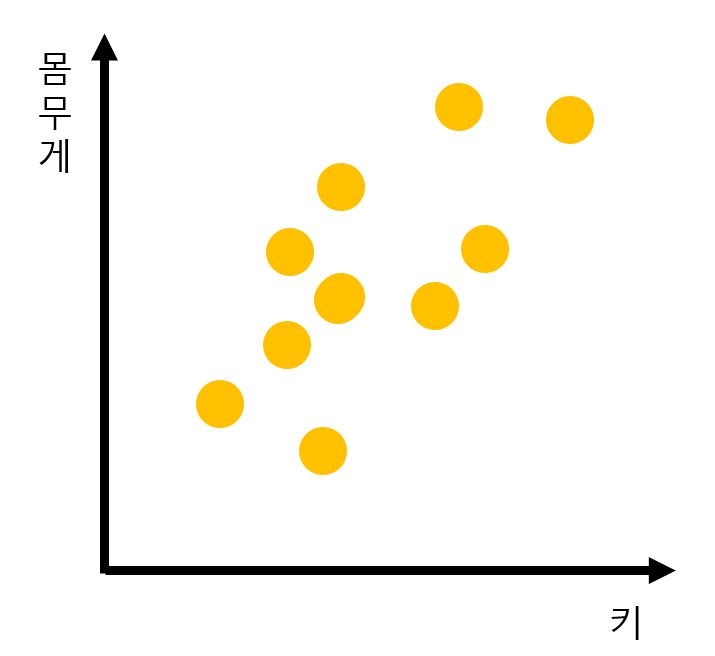

이 2개의 피처를 한개의 주성분을 가진 데이터 셋으로 차원축소하는 과정은 다음과 같습니다.



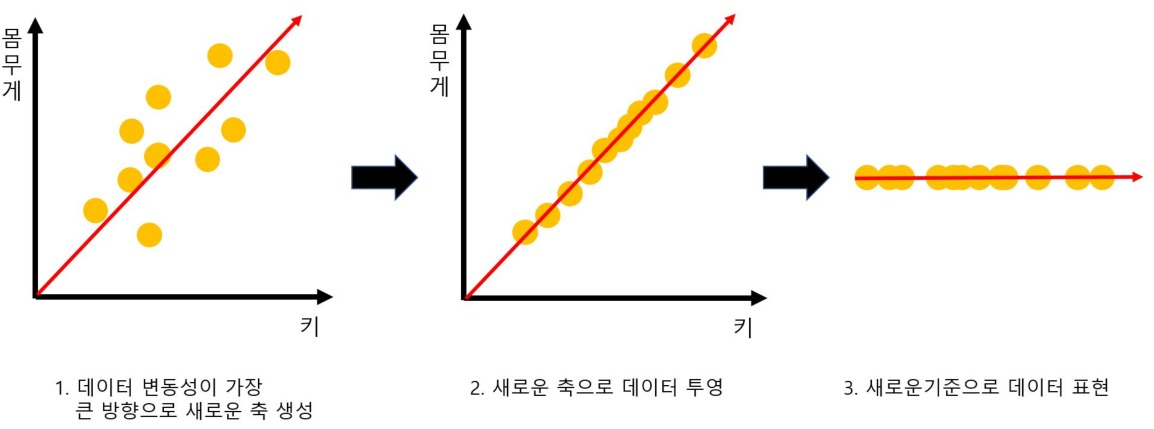



PCA는 제일 먼저 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축을 생성하고,

두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 합니다.

세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성합니다.

이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수 만큼의 차원으로 원본 데이터가 차원 축소 됩니다.



요약하면 PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것 입니다.


In [ ]:
머신러닝 모델링을 하다 보면 제한된 변수로 성능을 끌어 올리는 데는 한계가 있습니다.
실제 데이콘 대회 우승자 코드를 살펴보면,  전처리와 모델링은 크게 차이가 없습니다.
우승자들과 그 외 사람들을 비교해보면, 크게 다음 두 가지에서 큰 차이를 보입니다.

어떻게 데이터를 증강시켰는지?
어떤 파생 변수를 추가하였는지?

특히 정형 데이터의 경우 데이터 증강은 제한적입니다. 그래서 더욱더 효율적인 파생 변수를 추가하는 것이 중요합니다.
파생 변수를 추가하는 방법은
1. 연속형 변수를 범주형 변수로 변환
2. Polynomial Features 라이브러리 사용

ㅡㅡㅡㅡㅡ연속형 변수를 범주형 변수로 변환ㅡㅡㅡㅡㅡ
연속형 변수를 범주형 변수로 변환 시키는 방법은 여러가지가 있겠지만 크게 2가지에 대해서 알아보도록 하겠습니다.
1. 수치 범위 구간을 직접 지정해 레이블링 하기.
2. 판다스의 cut() 함수로 레이블링 하기

ㅡㅡㅡ1-1. 수치 범위 구간을 '직접' 지정해 레이블링ㅡㅡㅡ
# train 데이터의 pH 변수를 구간이 4개인 범주형 변수로 변환
# pH < 1  -> lowest
# 1<= pH < 2 -> low
# 2 <= pH < 3-> normal
# 3 <= pH -> high
def func(x):
    if x < 3:
        return 'lowest'
    elif x < 3.3:
        return 'low'
    elif x < 3.5:
        return 'normal'
    else :
        return'high'

train['pH'] = train['pH'].apply(lambda x : func(x))

ㅡㅡㅡ1-2. 판다스의 cut() 함수로 레이블링ㅡㅡㅡ(손쉽게 연속형 변수를 범주형 변수로 변환)
#데이콘의 와인 분류 대회 데이터를 기준으로한 설명
train['변수명'] = pd.cut(train['변수명'], 나눌 범주의 갯수(정수형), labels = False)

 # train 데이터의 alcohol 변수를 구간이 5개인 범주형 변수로 변환
train['alcohol'] = pd.cut(train.alcohol, 5,labels=False)

ㅡㅡㅡㅡㅡPolynomial Features 라는 라이브러리를 이용해 파생 변수를 생성ㅡㅡㅡㅡㅡ

먼저 Polynomial Features라는 라이브러리에 대해 알아 보도록 하겠습니다.
PolynomialFeatures라이브러리는 sklearn에 내장되어 있는 라이브러리 입니다.
이 라이브러리를 이용하면 현재 데이터를 다항식 형태로 변환 시킬 수 있습니다.

데이터에 x1,x2 변수가 있다 하면 PolynomialFeatures 라이브러리를 이용해
1, x1, x2, x1^2, x1*x2, x2^2 로 간단하게 변환 시킬 수 있습니다.

# 임의 데이터 생성
X = np.arange(6).reshape(3, 2)
df =  pd.DataFrame(X)
df.columns = ['x_1','x_2']

poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정
df_poly = poly_features.fit_transform(df) # fit_transform 메소드를 통해 데이터 변환
df_poly = pd.DataFrame(df_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환

df_poly.columns = ['1','x1','x2','x1^2','x1*x2','x2^2'] # df_poly의 컬럼을 1,x1,x2,x1^2,x1*x2,x2^2 로 변경
df_poly

ㅡㅡㅡPolynomial Features 실습ㅡㅡㅡ
# 라이브러리 및 데이터 불러오기
import pandas as pd

# PolynomialFeatures 라이브러리 호출
from sklearn.preprocessing import PolynomialFeatures

# 데이터 불러오기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 범주형 변수 제거
train.drop('type', axis = 1,inplace = True)
test.drop('type', axis = 1,inplace = True)

# index 변수 제거

train.drop('index', axis = 1,inplace = True)
test.drop('index', axis = 1,inplace = True)

 # train 데이터를 PolynomialFeatures 를 이용하여 변환

poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정

# 와인 품질 기준인 quality 변수를 제외한 나머지 변수를 포함한 데이터 변환.
df = train.drop('quality',axis = 1)
df_poly = poly_features.fit_transform(df) # fit_transform 메소드를 통해 데이터 변환
df_poly = pd.DataFrame(df_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환

# DecisionTreeClassifier 모델을 변환된 train 데이터로 학습

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(df_poly,train['quality'])

# test 데이터 변환

poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정

test_poly = poly_features.fit_transform(test) # fit_transform 메소드를 통해 데이터 변환
test_poly = pd.DataFrame(test_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환

# 결괏값 추론
pred = model.predict(test_poly)

# 정답 파일 생성
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.to_csv('poly.csv',index = False)

In [ ]:
#Booster
#튜닝이 아니라 최적 모델 찾기임
Boosting이란 : 여러개의 성능이 높지 않은 모델을 조합해서 사용하는 앙상블 기법중 하나입니다.
성능이 낮은 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측모형을 만듭니다.

In [ ]:
#XGboost
Boosting 모델중 하나인 XGboost 모델
XGBoost란 : XGBoost는 Extreme Gradient Boosting의 약자
Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost 가 대표적인데
이 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리가 XGBoost 이다.
Regression, Classification 문제를 모두 지원하며, 성능과 자원 효율이 좋아서, 인기 있게 사용되는 알고리즘

XGBoost의 장점?
기존 boosting 모델 대비 빠른 수행시간(병렬 처리)
과적합 규제 지원(Regularization)
분류와 회귀 task 에서 높은 예측 성능
Early Stopping(조기 종료) 기능 제공.
다양한 옵션을 제공해 Customizing이 용이.
결측치를 내부적으로 처리 함.

from xgboost import XGBClassifier
model = XGBClassifier()
# 원핫 인코딩 (pd.get_dummies())
train_one_df = pd.get_dummies(train_df)
test_one_df = pd.get_dummies(test_df)
#데이터를 학습에 적합하도록 바꿔주기
x_df = train_one_df~~
y_df = train_one_df~~
#모델 피팅시키기
model.fit(x_df, y_df)
#피팅된 모델로 예측하기
pred = model.predict(test_one_df)

#중요한 파라미터값들
일반 파라미터 : 부스팅을 수행할 때 트리를 사용할지, 선형 모델을 사용할지 등을 고른다.
부스터 파라미터 : 선택한 부스터에 따라서 적용할 수 있는 파라미터 종류가 다르다.
학습 과정 파라미터 : 학습 시나리오를 결정한다.

#일반 파라미터
booster [기본값 = gbtree]
  어떤 부스터 구조를 쓸지 결정한다.
  의사결정기반모형(gbtree), 선형모형(gblinear), dart가 있다.
n_jobs
  XGBoost를 실행하는 데 사용되는 병렬 스레드 수
verbosity [기본값 = 1]
  유효한 값은 0 (무음), 1 (경고), 2 (정보), 3 (디버그)

#부스터 파라미터
gbtree Booster의 파라미터
  learning_rate [ 기본값 : 0.3 ]
    learning rate이다.
    learning rate가 높을수록 과적합 하기 쉽다.
  n_estimators [ 기본값 : 100 ]
    생성할 weak learner의 수
    learning_rate가 낮을 땐, n_estimators를 높여야 과적합이 방지된다.
  max_depth [ 기본값 : 6 ]
    트리의 maximum depth이다.
    적절한 값이 제시되어야 하고 보통 3-10 사이 값이 적용된다.
    max_depth가 높을수록 모델의 복잡도가 커져 과적합 하기 쉽다.
  min_child_weight [ 기본값 : 1 ]
    관측치에 대한 가중치 합의 최소를 말한다.
    값이 높을수록 과적합이 방지된다.
  gamma [ 기본값 : 0 ]
    리프노드의 추가분할을 결정할 최소손실 감소값이다.
    해당값보다 손실이 크게 감소할 때 분리한다.
    값이 높을수록 과적합이 방지된다.
  subsample [ 기본값 : 1 ]
    weak learner가 학습에 사용하는 데이터 샘플링 비율이다.
    보통 0.5 ~ 1 사용된다.
    값이 낮을수록 과적합이 방지된다.
  colsample_bytree [ 기본값 : 1 ]
    각 tree 별 사용된 feature의 퍼센테이지이다.
    보통 0.5 ~ 1 사용된다.
    값이 낮을수록 과적합이 방지된다.
  lambda [기본값 = 1, 별칭 : reg_lambda]
    가중치에 대한 L2 Regularization 적용 값
    피처 개수가 많을 때 적용을 검토
    이 값이 클수록 과적합 감소 효과
  alpha [기본값 = 0, 별칭 : reg_alpha]
    가중치에 대한 L1 Regularization 적용 값
    피처 개수가 많을 때 적용을 검토
    이 값이 클수록 과적합 감소 효과

#학습 과정 파라미터
objective [ 기본값 : reg = squarederror ]
  reg : squarederror
    제곱 손실이 있는 회귀
  binary : logistic (binary-logistic classification)
    이항 분류 문제 로지스틱 회귀 모형으로 반환값이 클래스가 아니라 예측 확률
  multi : softmax
    다항 분류 문제의 경우 소프트맥스(Softmax)를 사용해서 분류하는데 반횐되는 값이 예측확률이 아니라 클래스임. 또한 num_class도 지정해야함.
  multi : softprob
    각 클래스 범주에 속하는 예측확률을 반환함.
  count : poisson (count data poison regression) 등 다양하다.
eval_metric
  모델의 평가 함수를 조정하는 함수다.
  설정한 objective 별로 기본설정값이 지정되어 있다.
  rmse: root mean square error
  mae: mean absolute error
  logloss: negative log-likelihood
  error: Binary classification error rate (0.5 threshold)
  merror: Multiclass classification error rate
  mlogloss: Multiclass logloss
  auc: Area under the curve
  map (mean average precision)등, 해당 데이터의 특성에 맞게 평가 함수를 조정한다.
seed [ 기본값 : 0 ]
  재현가능하도록 난수를 고정시킴.

#민감하게 조정해야하는 것
booster 모양
eval_metric(평가함수) / objective(목적함수)
eta
L1 form (L1 레귤러라이제이션 폼이 L2보다 아웃라이어에 민감하다.)
L2 form

#과적합 방지를 위해 조정해야하는 것
learning rate 낮추기 → n_estimators은 높여야함
max_depth 낮추기
min_child_weight 높이기
gamma 높이기
subsample, colsample_bytree 낮추기

In [ ]:
#LightGBM
부스팅 알고리즘은 오답에 가중치를 더하면서 학습을 진행하는 알고리즘 입니다.
그 중 Gradinet Boosting Machine(GBM)은 가중치를 경사하강법(gradint boosting)으로 업데이트 했습니다.
위에있는 XGBoost는 GBM의 단점을 보완한 알고리즘 입니다.

XGBoost는 굉장히 좋은 성능을 보여주었지만 여전히 속도면에서는 조금 느리다는 단점이 존재 합니다.
이러한 단점을 보완해주기위해 탄생한 것이 LightGBM(LGBM) 입니다.

LGBM의 특징
LGBM은 기존의 gradinet boosting 알고리즘과 다르게 동작됩니다.
기존 boosting 모델들은 트리를 level-wise 하게 늘어나는 방법을 사용한 반면, LGBM은 leaf wise(리프 중심) 트리 분할을 사용 합니다.
데이터 양이 많아지는 상황에서 빠른 결과를 얻는데 시간이 점점 많이 걸리고 있는데, Light GBM은 큰 사이즈의 데이터를 다룰 수 있고 실행시킬 때 적은 메모리를 차지합니다.

LGBM의 장점
대용량 데이터 처리 효율적인 메모리 사용 빠른 속도 GPU 지원

LGBM의 단점
Light GBM은 Leaf-wise growh로 과적합의 우려가 다른 Tree 알고리즘 대비 높은 편입니다.
그러므로 데이터의 양이 적을 경우 Overfiitng(과적합)에 취약한 면이 있어 데이터 양의 적을 경우 사용을 자제하는 것이 좋습니다.

#실제 적용 방법은 XGboost와 다를바 없다
from lightgbm import LGBMClassifier
model = LGBMClassifier()
# 원핫 인코딩 (pd.get_dummies())
train_one_df = pd.get_dummies(train_df)
test_one_df = pd.get_dummies(test_df)
#데이터를 학습에 적합하도록 바꿔주기
x_df = train_one_df~~
y_df = train_one_df~~
#모델 피팅시키기
model.fit(x_df, y_df)
#피팅된 모델로 예측하기
pred = model.predict(test_one_df)

#중요한 파라미터값들
파라미터	               default                          	설명
num_iterations	           100        	반복 수행하려는 트리의 개수 (너무 크면 오버피팅 발생)
objective             	regression	        수치예측이면 regression, 이진분류이면 binary
learning_rate            	0.1               	부스팅 스탭 반복할 때 학습률, 0~1 사이의 값
max_depth	                  1	                          트리의 깊이
min_data_in_leaf          	20	                  한 리프의 최소 데이터 수
                                     (decision tree의 min_sample_leaf와 동일, 오버피팅 제어)
num_leaves                	31            	하나의 트리가 가질 수 있는 최대 리프 개수
boosting                 	gbdt     	부스팅 방법 (gbdt: Gradient Boosting DecisionTree / rf: RandomForest)
bagging_fraction         	1.0	                  데이터 샘플링 비율, 오버피팅 제어
feature_fraction        	1.0	          개별 트리 학습 시 무작위로 선택하는 feature의 비율
lambda_l1	                0.0                      	L1 regulation 제어
lambda_l2	                0.0                     	L2 regulation 제어
metric                  	""         	성능평가를 어떤 것으로 할 것인지 (auc, l1, l2 등)

In [ ]:
#Voting Classifier
: 여러개의 모델을 결합하여 더 좋은 예측 결과를 도출 하는 앙상블 기법 중 하나 입니다.

Voting Classifier에는 hard voting 방법과 soft voting 방법이 있습니다 .

Hard Voting : Majority Voting이라고도 하며, 각각의 모델들이 결과를 예측하면 각 모델의 예측을 모아 다수결 투표로 최종 예측 결과를 선정하는 방식입니다.

Soft Voting : Probability Voting이라고 하며, 각 모델들이 예측한 결과값의 확률을 합산해 최종 예측 결과를 선정합니다.
단순히 개별 분류기의 예측 결과만을 고려하지 않고 높은 확률값을 반환하는 모델의 비중을 고려할 수 있기 때문에 Hard Voting 보다 성능이 더 좋은 편입니다.

요거 실제 적용은 간략화하기 힘드니까 구글코랩 웹/데이콘/더 좋은 예측결과/Voting Classifier 실습 가서 보길.

In [ ]:
#Hyper parameter
#튜닝 도구임
의사결정나무에는 정지규칙(stopping criteria) 이라는 개념이 있습니다.
하이퍼파라미터 튜닝은 정지규칙 값들을 설정하는 것을 의미합니다.

최대깊이 (max_depth) : 최대로 내려갈 수 있는 depth 입니다. 뿌리 노드로부터 내려갈 수 있는 깊이를 지정하며 작을수록 트리는 작아지게 됩니다.
최소 노드크기(min_samples_split) : 노드를 분할하기 위한 데이터 수 입니다. 해당 노드에 이 값보다 적은 확률변수 수가 있다면 stop. 작을수록 트리는 커지게 됩니다.
최소 향상도(min_impurity_decrease) : 노드를 분할하기 위한 최소 향상도 입니다. 향상도가 설정값 이하라면 더 이상 분할하지 않습니다. 작을수록 트리는 커집니다.
비용복잡도(Cost-complexity) : 트리가 커지는 것에 대해 패널티 계수를 설정해서 불순도와 트리가 커지는 것에 대해 복잡도를 계산하는 것입니다.
등등
:
:
이와 같은 정지규칙들을 종합적으로 고려해 최적의 조건값을 설정할 수 있으며 이를 하이퍼파라미터 튜닝이라고 합니다.

그 방법으로는
1. Grid Search
2. Random Search
3. Bayesian Optimization

In [ ]:
#GridSearch
하이퍼파라미터 튜닝에는 다양한 방법론이 있습니다.
그 중 Best 성능을 나타내는 GridSearch는 완전 탐색(Exhaustive Search) 을 사용합니다.
가능한 모든 조합 중에서 가장 우수한 조합을 찾아줍니다.
하지만, 완전 탐색이기 때문에 Best 조합을 찾을 때까지 시간이 매우 오래 걸린다는 단점이 있습니다.

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

#하이퍼파라미터 값은 사용자가 직접 지정 해주며 분석가 본인의 경험에 따라 선정하는 경우가 많습니다.
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion = 'mse', random_state=2020) #criterion : 어떤 방식으로 '채점'할지 정함. #random_state : 원래는 랜덤 할 값들이 하나로 지정되며 다른 피씨에서랑 같은 값을 쓰면 출력이 같아짐

params = {'n_estimators': [200, 300, 500],
          'max_features': [5, 6, 8],
          'min_samples_leaf': [1, 3, 5]}

greedy_CV = GridSearchCV(model, param_grid=params, cv = 3, n_jobs = -1)
greedy_CV.fit(X_train, Y_train)

pred = greedy_CV.predict(test)

In [ ]:
#Random Search




In [ ]:
#Bayesian Optimization
Bayesian Optmization은 하이퍼 파라미터 튜닝과 관련된 내용입니다.
우리가 흔히 알고 있는 하이퍼 파라미터 튜닝은 Grid Search, Random Search입니다.
하지만 그 2가지에는 공통적인 문제점이 있습니다.
"최적의 값을 찾아갈 수 없다"라는 문제점입니다.
이를 해결하기 위한 방법 중 하나가 "Bayesian Optimization"입니다.

Bayesian Optimization은 보통
"Gausain Process"라는 통계학을 기반으로 만들어진 모델로,
여러개의 하이퍼 파라미터들에 대해서, "Aqusition Fucntion"을 적용했을 때,
"가장 큰 값"이 나올 확률이 높은 지점을 찾아냅니다. 자세한 수식과 증명은 생략하겠습니다.

우리가 다룰 Bayesian Optimization 패키지에서는 다음과 같은 단계가 필요합니다.

변경할 하이퍼 파라미터의 범위를 설정한다.
Bayesian Optimization 패키지를 통해, 하이퍼 파라미터의 범위 속 값들을 랜덤하게 가져온다.
처음 R번은 정말 Random하게 좌표를 꺼내 성능을 확인한다.
이후 B번은 Bayesian Optimization을 통해 B번만큼 최적의 값을 찾는다.

In [ ]:
#Cross Validation, CV
#모델 검증법
교차검증
test데이터에 모델을 피팅시키다보면 과적합(오버피팅)될 수 있다.
이는 train데이터를 조금 잘라내 test데이터로서 활용하는 것으로 해결될 수 있다.
이렇게 train데이터를 잘라내 따로 test용 데이터로 사용하는 것을 교차검증이라 한다.

교차검증의 장점
모든 데이터셋을 훈련에 활용할 수 있다.
정확도를 향상시킬 수 있다.
데이터 부족으로 인한 underfitting 또한 방지할 수 있다.
모든 데이터셋을 평가에 활용할 수 있다.
평가에 사용되는 데이터 편중을 막을 수 있다.
평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있다.

교차검증의 단점
Iteration 횟수가 많기 때문에, 모델 훈련/평가 시간이 오래 걸린다.

In [ ]:
#Hold-out
Hold-out은 교차검증이전의 개념으로 단순하게 Train 데이터를 (train, valid)라는 이름의 2개의 데이터로 나누는 작업입니다.
보통 train : valid = 8:2 혹은 7:3의 비율로 데이터를 나눕니다.
데이터를 이렇게 나누는 이유는 무엇일까요?
바로 예측 성능을 가늠해보기 위해서 입니다.
다만 Hold-out의 문제점은 데이터의 낭비입니다.
데이터 사이언스에 있어서, 데이터는 소중한 자원입니다.
하지만 단순하게 trian과 test로 분할하게 된다면, 20%의 데이터는 모델이 학습할 기회도 없이, 예측만하고 버려지게 됩니다.
그래서 "모든 데이터를 학습하게 해보자!"라는 생각에서 나온 것이 "교차검증", 즉 K-Fold입니다.

In [ ]:
#K-Fold
#모델이 아니고 모델 검증법임

1. K-Fold를 이용해서 Train과 Valid Data를 나눈다.
2. Model을 이용해서 train 데이터를 학습한다.
3. Model을 이용해서 valid 데이터를 예측해 성능을 확인한다.
4. Model을 이용해서 test 데이터를 예측한다.
5. n_splits를 5로 설정한다면, 5개의 결과값들에 대한 “최빈값”을 이용해 가장 등장할 가능성이 높은 결과값으로 결정한다.
6. 결과를 제출한다.

#데이콘의 와인 품질 분류 대회 자료를 기반으로한 설명임
#K-Fold 활용법은 매우매우 많으므로 데이터 형태에 따라 적합한 모델을 선택하자. 여기서는 평범한 K-Fold를 사용했다.

# "X"라는 변수에 train의 "index"와 "quality"를 제외하고 지정
# "y"라는 변수에는 "quality"를 지정
X = train.drop(columns = ['index','quality'])
y = train['quality']

# "kf"라는 변수에 KFold를 지정
# n_splits는 5, shuffle은 True, random_state는 0으로 설정
kf = KFold(n_splits = 5, shuffle = True, random_state = 0) #n_splits : 데이터를 몇조각 낼건지. #shuffle=True : 데이터를 순차적으로 자르지 않고 랜덤하게 섞어 등분한다.

# "model"이라는 변수에 RandomForestClassifier를 지정.
# valid_scores라는 빈 리스트를 하나 만들어줍시다.
# test_predictions라는 빈 리스트를 하나 만들어 줍시다.
model = RandomForestClassifier(random_state = 0)
valid_scores = []
test_predictions = []

#kf.split()을 활용해, 반복문으로 X_tr, y_tr, X_val, y_val을 설정
for train_idx, valid_idx in kf.split(X,y) :
 X_tr = X.iloc[train_idx]
 y_tr = y.iloc[train_idx]
 X_val = X.iloc[valid_idx]
 y_val = y.iloc[valid_idx]

# 앞의 문제에 이어서 반복문 속에서 model.fit(X_tr, y_tr)을 활용해 모델을 학습
for train_idx, valid_idx in kf.split(X,y) :
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]
  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]
  model.fit(X_tr, y_tr)

# 앞의 문제에 이어서 반복문 속에서 "valid_prediction"이라는 변수에 model.predict(X_val)의 결과를 저장
for train_idx, valid_idx in kf.split(X,y) :
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]
  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]
  model.fit(X_tr, y_tr)
  valid_prediction = model.predict(X_val)

# 앞의 문제에 이어서 반복문 속에서 accuracy_score를 이용해, 모델이 어느정도의 예측 성능이 나올지 확인
# 그리고 "valid_prediction"의 점수를 scores에 저장
# 반복문에서 빠져나온 후에 np.mean()을 활용해 평균 점수를 예측
for train_idx, valid_idx in kf.split(X,y) :
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]
  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]
  model.fit(X_tr, y_tr)
  valid_prediction = model.predict(X_val)
  score = accuracy_score(y_val, valid_prediction)
  valid_scores.append(score)
  print(score)
print('평균 점수 : ', np.mean(valid_scores))

# 이제 어느정도의 성능이 나올지 알게 되었으니, 반복문 속에서 test를 예측해 "test_prediction"이라는 변수에 지정
# test_prediction을 지정했다면, "test_precitions"라는 빈 리스트에 넣어줍시다.
for train_idx, valid_idx in kf.split(X,y) :
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]
  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]
  model.fit(X_tr, y_tr)
  test_prediction = model.predict(test.drop(columns = ['index']))
  test_predictions.append(test_prediction)

# 이제 결과 값을 만들어 보겠습니다.
# "test_precitions"를 Data Frame으로 만들어주세요
test_predictions = pd.DataFrame(test_predictions)

# DF.mode()를 활용해 열별 최빈값을 확인하고, "test_prediction"이라는 변수에 지정해봅시다.
# "test_prediction"의 첫 행을 최종 결과값으로 사용합시다.
test_prediction = test_predictions.mode()
test_prediction = test_predictions.values[0]

# data의 sample_submission 파일을 불러와 "quality"라는 변수에 "test_precition"을 저장해줍시다.
# 그 이후에는, "data/submission_KFOLD.csv"에 저장하고, 제출해봅시다.
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('data/submission_KFOLD.csv', index=False)

In [ ]:
#stratified k-fold
일반 k-fold 의 문제점 : 데이터 셋을 일정한 간격으로 잘라서 사용합니다.
그러다 보니 target의 비율이 일정하지 않게 테스트 셋에 들어 갈 수 있습니다.
만약 target이 0, 1, 2 세가지로 이뤄져 있는데, 이 상황에서 데이터를 잘라서 학습 한다면
 0, 1만 답으로 가지고 있는 학습데이터를 가지고 학습해버려서 모델은 2라는 답을 도출 할 수 없을 것입니다 .
마찬가지로 1, 2만 가지고 학습을 진행한다면 0이라는 답을 도출 할 수 없을 것입니다. 이러한 점이 k-fold의 치명적인 문제점입니다.

이렇듯 k-fold는 target 데이터의 비율을 일정하게 유지 하지 못하는 반면
stratified k-fold는 일정 하게 유지하며 교차 검증을 진행 합니다.


# 라이브러리 및 데이터 불러오기
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

# 원핫 인코딩 (pd.get_dummies())

train_one = pd.get_dummies(train)
test_one = pd.get_dummies(test)

# StratifiedKFold라이브러리를 이용해 5개의 fold로 나눔.

skf = StratifiedKFold(n_splits = 5)

X = train_one.drop('quality',axis = 1)
y = train_one['quality']
cnt = 1
acc = 0
for train_idx, valid_idx in skf.split(X,y):

  train_data = train_one.iloc[train_idx]
  valid_data = train_one.iloc[valid_idx]

  # 모델 정의
  model = LGBMClassifier()

  # train_X 는 train_data에서 quality 를 제외한 모든 변수
  # train_y 는 train_data의 qulity 변수

  train_X = train_data.drop('quality',axis= 1)
  train_y = train_data['quality']

  # fit 메소드를 이용해 모델 학습
  model.fit(train_X,train_y)


  valid_X = valid_data.drop('quality',axis = 1)
  valid_y = valid_data['quality']

  # predict 메소드와 valid_X 데이터를 이용해 품질 예측
  pred = model.predict(valid_X)

  # 모델 정확도 출력
  print(cnt," 번째 모델 정확도 : " ,accuracy_score(pred,valid_y))
  acc += accuracy_score(pred,valid_y)
  cnt+=1

print('모델 정확도 평균 : ',acc/5)